<a href="https://colab.research.google.com/github/anees028/Classification_Practice/blob/main/Assingment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# -*- coding: utf-8 -*-
"""
Automatically generated by Colaboratory.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Read Images.csv
images_df = pd.read_csv('Images.csv', header=None, skiprows=1, delimiter=';')
images_df.columns = ['ID', 'Class']

# Read EdgeHistogram.csv
edge_hist_df = pd.read_csv('EdgeHistogram.csv', header=None, skiprows=1, delimiter=';')
edge_hist_df.columns = ['ID'] + [f'Dim_{i}' for i in range(1, len(edge_hist_df.columns))]

# Join dataframes on ID
merged_df = pd.merge(images_df, edge_hist_df, on='ID')

# Split data into features and target
X = merged_df.drop(['ID', 'Class'], axis=1)
y = merged_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNNClassifier': KNeighborsClassifier()
}

# Define hyperparameters for grid search
parameters = {
    'RandomForestClassifier': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]},
    'DecisionTreeClassifier': {'max_depth': [None, 10, 20, 30]},
    'KNNClassifier': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f'Training {model_name}...')
    clf = GridSearchCV(model, parameters[model_name], cv=5)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_mat
    }

    print(f'{model_name} accuracy: {accuracy}')

# Save results to CSV files
for model_name, result_data in results.items():
    # Save confusion matrix
    confusion_df = pd.DataFrame(result_data['confusion_matrix'], columns=sorted(y.unique()), index=sorted(y.unique()))
    confusion_df.to_csv(f'{model_name}_confusion_matrix.csv', index_label='Class')

    # Save hyperparameters
    params = clf.get_params()
    with open(f'{model_name}_hyperparameters.csv', 'w') as file:
        file.write('Class,' + ','.join(sorted(y.unique())) + '\n')
        for param_name, param_value in params.items():
            file.write(f'{param_name},{param_value}\n')



Training RandomForestClassifier...
RandomForestClassifier accuracy: 0.5019136139967195
Training DecisionTreeClassifier...
DecisionTreeClassifier accuracy: 0.32640787315472936
Training KNNClassifier...
KNNClassifier accuracy: 0.5095680699835976


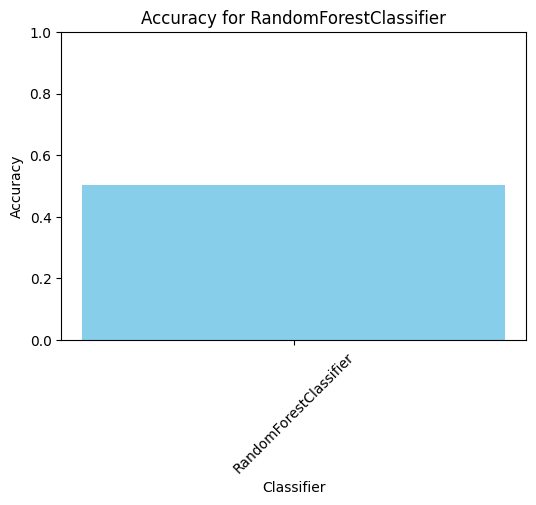

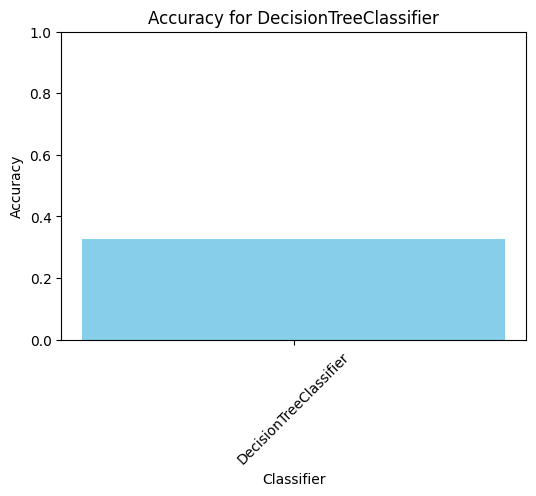

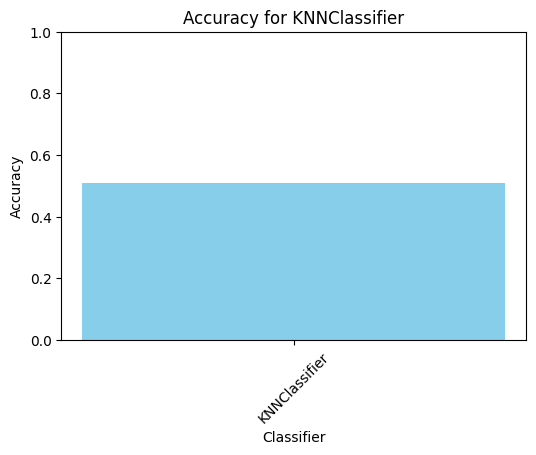

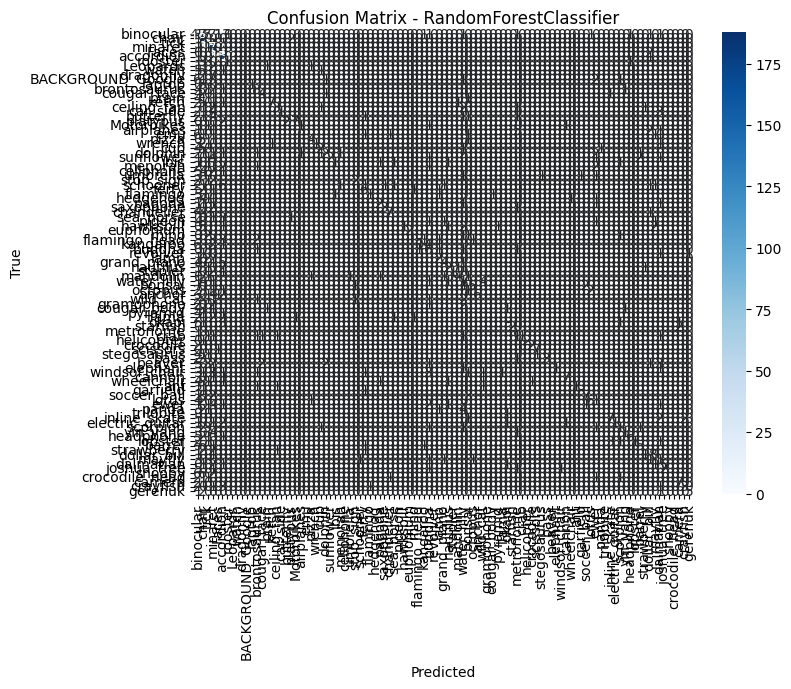

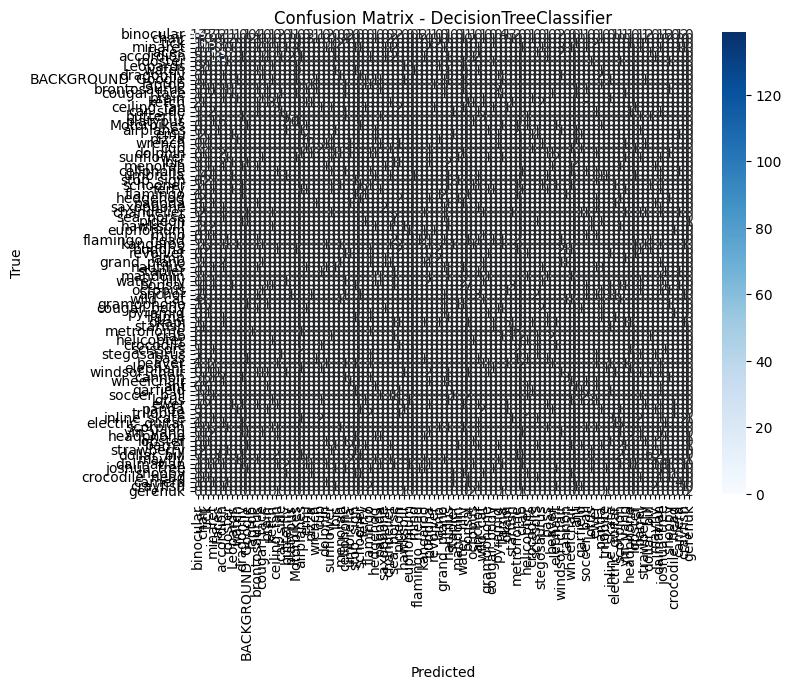

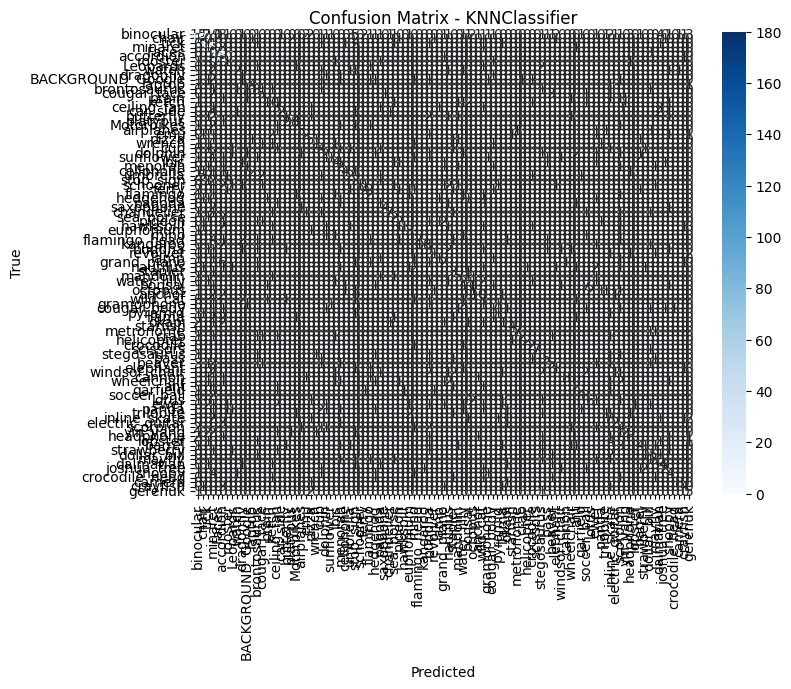

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accuracy for each classifier
for model_name, result_data in results.items():
    plt.figure(figsize=(6, 4))
    plt.bar(model_name, result_data['accuracy'], color='skyblue')
    plt.title(f'Accuracy for {model_name}')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Plot confusion matrices for each classifier
for model_name, result_data in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(result_data['confusion_matrix'], annot=True, cmap='Blues', fmt='d', xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

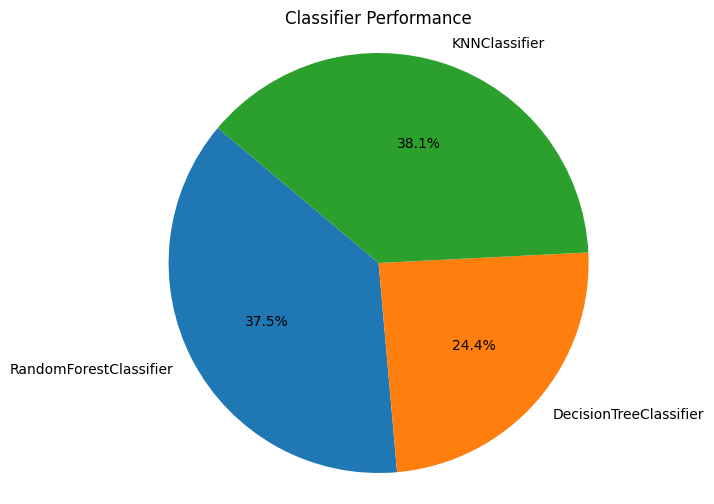

In [4]:
import matplotlib.pyplot as plt

# Extract classifier names and accuracies
classifier_names = list(results.keys())
accuracies = [results[classifier]['accuracy'] for classifier in classifier_names]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(accuracies, labels=classifier_names, autopct='%1.1f%%', startangle=140)
plt.title('Classifier Performance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()